In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import csv
import seaborn as sb
import re
import seaborn as sns

In [45]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn import metrics
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix as confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from nltk.tokenize import word_tokenize


In [4]:
# read files
True_news = pd.read_csv('/kaggle/input/datdset/True.csv')
Fake_news = pd.read_csv('/kaggle/input/datdset/Fake.csv')

In [5]:
# create label that take value true at 0

True_news['label'] = 0

# create label that take value false at 1

Fake_news['label'] = 1

In [6]:
# check the if data in files read probably and print first 10 records
True_news.head(10)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",0
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",0
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",0
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",0
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",0


In [7]:
# check the if data in files read probably and print first 10 records
Fake_news.head(10)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",1
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",1
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",1
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",1
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",1


In [8]:
# create to dataset that holds the feastures that we decide to train on it
dataset1 = True_news[['text','label']]
dataset2 = Fake_news[['text','label']]

### **Word Cloud Visualization**

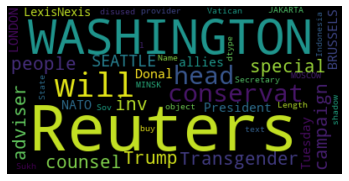

In [9]:
# create a list of the text data from the 'text' column
text = str(dataset1['text'])

# create a word cloud object
wordcloud = WordCloud().generate(text)

# plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


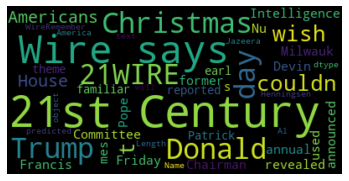

In [10]:
# create a list of the text data from the 'text' column
text = str(dataset2['text'])

# create a word cloud object
wordcloud = WordCloud().generate(text)

# plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# **Merging Dataset1 and Dataset2 Dataframes**

In [11]:
# merge dataset1 and dataset2 in one new dataset
dataset = pd.concat([dataset1 , dataset2])

In [12]:
# dimensions of dataset contaning 44898 columns and 5 rows
dataset.shape

(44898, 2)

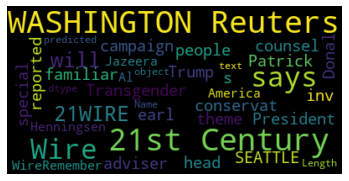

In [13]:
# create a list of the text data from the 'text' column
text = str(dataset['text'])

# create a word cloud object
wordcloud = WordCloud().generate(text)

# plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


### **Data Distribution**

<AxesSubplot:xlabel='label', ylabel='count'>

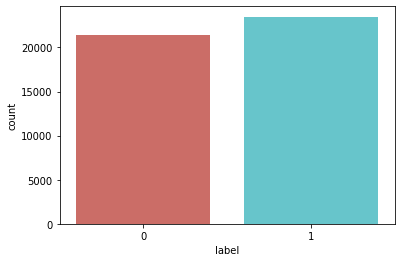

In [14]:
def create_distribution(dataFile):
    return sb.countplot(x='label', data=dataFile, palette='hls')

# by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(dataset)

In [15]:
dataset = dataset.dropna()
dataset = dataset.dropna(thresh=2)
dataset.isnull().sum()

text     0
label    0
dtype: int64

### **Data Quality Check**

In [16]:
# function help to check data quality 
def data_qualityCheck():
    print("Checking data qualitites..")
    # no null values
    dataset.isnull().sum()
    dataset.info()  
    print("check finished.")
data_qualityCheck()

Checking data qualitites..
<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB
check finished.


### Balanced or Unbalanced dataset

In [17]:
dataset['label'].value_counts()

1    23481
0    21417
Name: label, dtype: int64

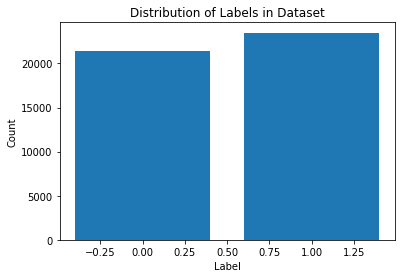

In [18]:
# Get the counts of each label
label_counts = dataset['label'].value_counts()

# Create a bar chart
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels in Dataset')
plt.show()


In [19]:
dataset1.shape # true news

(21417, 2)

In [20]:
dataset2.shape # fake news

(23481, 2)

### Shuffle or Resample

In [21]:
# resample the data
dataset = dataset.sample(frac = 1)

In [22]:
dataset.head(20)

,text,label
14087,So true! The freebies promised to Americans on...,1
1935,WASHINGTON (Reuters) - President Donald Trump ...,0
20191,You don t want to miss a second of Judge Jeani...,1
16878,BEIRUT (Reuters) - Lebanon s top court on Frid...,0
19214,So much for the cute little puppies and clydes...,1
18768,"Earlier this evening, Le Pen had security auth...",1
11902,"In 2008, Jennifer Hudson the Dream Girls sta...",1
17360,ISTANBUL (Reuters) - Two Turkish soldiers were...,0
3387,WASHINGTON (Reuters) - President Donald Trump ...,0
688,WASHINGTON (Reuters) - U.S. Senate Republicans...,0


In [23]:
dataset.describe

<bound method NDFrame.describe of                                                     text  label
14087  So true! The freebies promised to Americans on...      1
1935   WASHINGTON (Reuters) - President Donald Trump ...      0
20191  You don t want to miss a second of Judge Jeani...      1
16878  BEIRUT (Reuters) - Lebanon s top court on Frid...      0
19214  So much for the cute little puppies and clydes...      1
...                                                  ...    ...
10091  WASHINGTON (Reuters) - U.S. Republican Party C...      0
5691   To conservatives, everything is a conspiracy. ...      1
314    Republicans are desperately trying to repeal O...      1
18464  BEIRUT (Reuters) - Islamic State said three of...      0
701    Donald Trump s Secretary of Energy Rick Perry ...      1

[44898 rows x 2 columns]>

In [24]:
dataset.describe()

,label
count,44898.000000
mean,0.522985
std,0.499477
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


# **Cleaning Data Process**

In [25]:
ps = WordNetLemmatizer()

In [26]:
# removing unwanted words in text to improve preformunce 
stopwords = stopwords.words('english')

In [27]:
def cleaning_data(row):
    
    # convert text to into lower case
    row = row.lower() 
    
    # this line of code only take words from text and remove number and special character using Regular expression
    row = re.sub('[^a-zA-Z]' , ' ' , row)
    
    # split the data and make token.
    token = row.split() 
    
    # lemmatize the word and remove stop words like a, an , the , is ,are ...
    news = [ps.lemmatize(word) for word in token if not word in stopwords]  
    
    # finaly join all the token with space
    cleanned_news = ' '.join(news) 
    
    # return cleanned data
    return cleanned_news 

In [28]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [29]:
dataset['text'] = dataset['text'].apply(lambda x : cleaning_data(x)) # apply cleaning_data on the dataset text cloumn 

In [30]:
dataset.isnull().sum()

text     0
label    0
dtype: int64

# **Convert text to vectors**

In [31]:
# convert text to numerical data can be used in our modules
vectorizer = TfidfVectorizer(max_features = 5000 , lowercase=False , ngram_range=(1,2)) # 1-gram 2- gram combination words

In [32]:
dataset.shape

(44898, 2)

In [33]:
X = dataset.iloc[:3500,0] # rows 
y = dataset.iloc[:3500,1] # columns 

In [34]:
X.head()

14087    true freebie promised american back tax paying...
1935     washington reuters president donald trump inte...
20191    want miss second judge jeanine brilliant analy...
16878    beirut reuters lebanon top court friday senten...
19214    much cute little puppy clydesdale budweiser cr...
Name: text, dtype: object

In [35]:
y.head()

14087    1
1935     0
20191    1
16878    0
19214    1
Name: label, dtype: int64

### **Training and Test Set**

In [36]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 ,random_state = 10)

In [37]:
# First fits the vectorizer to the training data by learning the vocabulary, 
# Transforms the training data into a numerical feature matrix.
# store it in vec_train after converted it to numpy array using toarray() function

vec_train_data = vectorizer.fit_transform(X_train).toarray()

In [38]:
X_train.shape , X_test.shape

((2800,), (700,))

In [39]:
vec_test_data = vectorizer.transform(X_test).toarray()

In [40]:
vec_train_data.shape , vec_test_data.shape

((2800, 5000), (700, 5000))

In [41]:
y_train.value_counts() # balanced partition

1    1461
0    1339
Name: label, dtype: int64

In [42]:
y_test.value_counts() # balanced partition

1    362
0    338
Name: label, dtype: int64

In [43]:
# This method returns a list of the feature names that were learned during the fit process, 
# which are essentially the unique words or n-grams that were found in the training data. 
X_training = pd.DataFrame(vec_train_data , columns=vectorizer.get_feature_names_out())
X_testing = pd.DataFrame(vec_test_data , columns= vectorizer.get_feature_names_out())

# **MultinomialNB**

In [84]:
# Create an instance of MultinomialNB
#class_prior = [0.5, 0.5]  # or some other value
#clf = MultinomialNB(alpha=0.5)#, fit_prior=True, class_prior=class_prior)

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Create the model
clf = MultinomialNB()

# Define a range of values for alpha
param_grid = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

# Use grid search with cross-validation to find the optimal value of alpha
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_training, y_train)

# Print the optimal value of alpha
print(grid_search.best_params_)


{'alpha': 0.1}


In [128]:
class_prior = [0.5, 0.5]

In [129]:
clf = MultinomialNB(alpha=0.1, fit_prior=True, class_prior=class_prior)


In [130]:
# Train the classifier on the training data

clf.fit(X_training, y_train)

# Predict the labels for the test data

y_pred  = clf.predict(X_testing)

In [131]:
# value_count() returns a Series containing the counts of unique values in the Series.
pd.Series(y_pred).value_counts()

1    356
0    344
dtype: int64

In [132]:
pd.Series(y_test).value_counts()

1    370
0    330
Name: label, dtype: int64

# **EXP**
# precision_macro_avg = (0.95 + 0.95) / 2 = 0.95
# recall_macro_avg = (0.96 + 0.95) / 2 = 0.95
# f1_score_macro_avg = (0.95 + 0.95) / 2 = 0.95

In [133]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       330
           1       0.95      0.91      0.93       370

    accuracy                           0.93       700
   macro avg       0.93      0.93      0.93       700
weighted avg       0.93      0.93      0.93       700



# **Now predict on both train set and visualize the train set**

In [134]:
y_pred_train = clf.predict(X_training)
print(classification_report(y_train , y_pred_train))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1367
           1       0.96      0.92      0.94      1433

    accuracy                           0.94      2800
   macro avg       0.94      0.94      0.94      2800
weighted avg       0.94      0.94      0.94      2800



In [135]:
accuracy_score(y_train , y_pred_train)

0.9403571428571429

In [136]:
# Calculate the confusion matrix for the test data
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[1317   50]
 [ 117 1316]]


<AxesSubplot:>

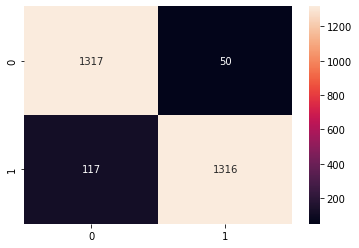

In [137]:
# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_matrix, annot=True, fmt='d')

In [138]:
accuracy_score(y_test , y_pred)

0.9257142857142857

In [139]:
# Calculate the confusion matrix for the test data
from mlxtend.evaluate import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[311  19]
 [ 33 337]]


<AxesSubplot:>

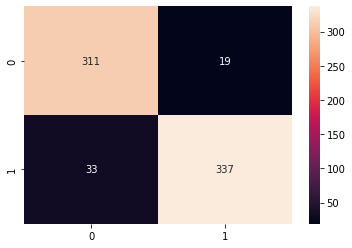

In [140]:
# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d')

# **Manual Test**

In [141]:
# Clean the text
news1 = cleaning_data(str("WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trumpâ€™s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administrationâ€™s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1. A Justice Department official said the administration will not challenge those rulings. â€œThe Department of Defense has announced that it will be releasing an independent study of these issues in the coming weeks. So rather than litigate this interim appeal before that occurs, the administration has decided to wait for DODâ€™s study and will continue to defend the presidentâ€™s lawful authority in District Court in the meantime,â€ the official said, speaking on condition of anonymity. In September, the Pentagon said it had created a panel of senior officials to study how to implement a directive by Trump to prohibit transgender individuals from serving. The Defense Department has until Feb. 21 to submit a plan to Trump. Lawyers representing currently-serving transgender service members and aspiring recruits said they had expected the administration to appeal the rulings to the conservative-majority Supreme Court, but were hoping that would not happen. Pentagon spokeswoman Heather Babb said in a statement: â€œAs mandated by court order, the Department of Defense is prepared to begin accessing transgender applicants for military service Jan. 1. All applicants must meet all accession standards.â€ Jennifer Levi, a lawyer with gay, lesbian and transgender advocacy group GLAD, called the decision not to appeal â€œgreat news.â€ â€œIâ€™m hoping it means the government has come to see that there is no way to justify a ban and that itâ€™s not good for the military or our country,â€ Levi said. Both GLAD and the American Civil Liberties Union represent plaintiffs in the lawsuits filed against the administration. In a move that appealed to his hard-line conservative supporters, Trump announced in July that he would prohibit transgender people from serving in the military, reversing Democratic President Barack Obamaâ€™s policy of accepting them. Trump said on Twitter at the time that the military â€œcannot be burdened with the tremendous medical costs and disruption that transgender in the military would entail.â€ Four federal judges - in Baltimore, Washington, D.C., Seattle and Riverside, California - have issued rulings blocking Trumpâ€™s ban while legal challenges to the Republican presidentâ€™s policy proceed. The judges said the ban would likely violate the right under the U.S. Constitution to equal protection under the law. The Pentagon on Dec. 8 issued guidelines to recruitment personnel in order to enlist transgender applicants by Jan. 1. The memo outlined medical requirements and specified how the applicantsâ€™ sex would be identified and even which undergarments they would wear. The Trump administration previously said in legal papers that the armed forces were not prepared to train thousands of personnel on the medical standards needed to process transgender applicants and might have to accept â€œsome individuals who are not medically fit for service.â€ The Obama administration had set a deadline of July 1, 2017, to begin accepting transgender recruits. But Trumpâ€™s defense secretary, James Mattis, postponed that date to Jan. 1, 2018, which the presidentâ€™s ban then put off indefinitely. Trump has taken other steps aimed at rolling back transgender rights. In October, his administration said a federal law banning gender-based workplace discrimination does not protect transgender employees, reversing another Obama-era position. In February, Trump rescinded guidance issued by the Obama administration saying that public schools should allow transgender students to use the restroom that corresponds to their gender identity."))
# Transform the text using the vectorizer
single_prediction1 = clf.predict(vectorizer.transform([news1]).toarray())
single_prediction1


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [142]:
news2 = cleaning_data(str("omar predict: false news"))
single_prediction2 = clf.predict(vectorizer.transform([news2]).toarray())
single_prediction2

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  "X does not have valid feature names, but"


array([1])

# **Losng Short Memory LSTM**

In [47]:
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential
import tensorflow as tf


In [48]:
# Read in the text and labels from the dataset
text = dataset['text']  # Replace 'text' with the name of the column in dataset that holds the text
labels = dataset['label']  # Replace 'label' with the name of the column in dataset that holds the labels

# Tokenize the articles
tokenizer = Tokenizer(num_words=5000)  # Keep the top 5000 most frequent words
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)

# Get the size of the vocabulary
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 to account for the 0 index

# Pad the sequences to the same length
max_length = max([len(s) for s in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length)

# Build the model
clf = Sequential()
clf.add(Embedding(input_dim=vocab_size, output_dim=10, input_length=max_length))
clf.add(LSTM(units=100, dropout=0.2, recurrent_dropout=0.2))
clf.add(Dense(1, activation='sigmoid'))

# Compile the model
clf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

2023-01-06 17:38:40.257397: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-06 17:38:40.258434: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-06 17:38:40.460250: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-06 17:38:40.461236: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-06 17:38:40.462064: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [60]:
# Train the model
history = clf.fit(padded_sequences, labels, epochs=5, batch_size=1200, validation_split=0.6)

# Get the training and validation loss and accuracy
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

Epoch 1/5
15/15 [==============================] - 321s 22s/step - loss: 0.2394 - accuracy: 0.9492 - val_loss: 0.2165 - val_accuracy: 0.9542
Epoch 2/5
15/15 [==============================] - 321s 22s/step - loss: 0.2087 - accuracy: 0.9534 - val_loss: 0.1916 - val_accuracy: 0.9567
Epoch 3/5
15/15 [==============================] - 322s 22s/step - loss: 0.1821 - accuracy: 0.9594 - val_loss: 0.1761 - val_accuracy: 0.9527
Epoch 4/5
15/15 [==============================] - 318s 21s/step - loss: 0.2059 - accuracy: 0.9344 - val_loss: 0.2451 - val_accuracy: 0.9229
Epoch 5/5
15/15 [==============================] - 313s 21s/step - loss: 0.1824 - accuracy: 0.9462 - val_loss: 0.1546 - val_accuracy: 0.9644


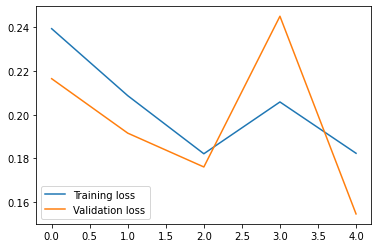

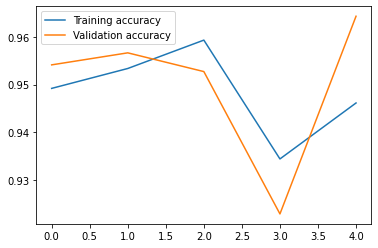

In [61]:
# Plot the training and validation loss
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.legend()
plt.show()